# Read and write images

In [1]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
img_path = os.path.join(os.getcwd(), "data", "uni.png")
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
trans_mask = img[:,:,3] == 0
img[trans_mask] = 255

In [3]:
print(type(img))
print(img.shape)
print(img.dtype)
print(np.max(img))
print(sys.getsizeof(img), "bytes")

<class 'numpy.ndarray'>
(1024, 1017, 4)
uint8
255
4165760 bytes


In [4]:
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

# or, convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R2 = img_rgb[:,:,0]
G2 = img_rgb[:,:,1]
B2 = img_rgb[:,:,2]

# another way to rgb
img_rgb2 = img[:,:,::-1]

print((R==R2).all())
print((G==G2).all())
print((B==B2).all())

True
True
True


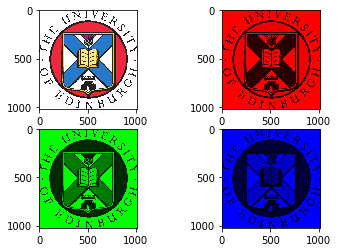

In [5]:
# show the colored image and channels
mask = np.zeros(img_rgb.shape, dtype=np.uint8)
img_r = mask.copy()
img_r[:,:,0] = R
img_g = mask.copy()
img_g[:,:,1] = G
img_b = mask.copy()
img_b[:,:,2] = B

fig, ax = plt.subplots(2, 2)
ax = ax.flatten()
ax[0].imshow(img_rgb)
ax[1].imshow(img_r)
ax[2].imshow(img_g)
ax[3].imshow(img_b)
plt.show()

In [6]:
# However, we always use [0, 1] float images to do the processing
def img2double(img):
    info = np.iinfo(img.dtype) # Get the data type of the input image
    return img.astype(np.float32) / info.max # Divide all values by the largest possible


In [7]:
img_float = img2double(img_rgb)
R = img_float[:,:,0]
G = img_float[:,:,1]
B = img_float[:,:,2]
print(img_float.dtype)
print(np.max(img_float))

float32
1.0


In [8]:
gray = cv2.cvtColor(img_float, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img_float, cv2.COLOR_RGB2HSV)
lab = cv2.cvtColor(img_float, cv2.COLOR_RGB2LAB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


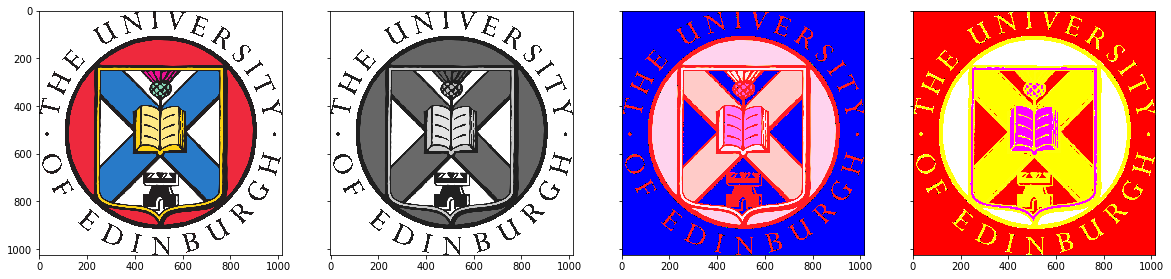

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 40), sharey=True)
ax = ax.flatten()
ax[0].imshow(img_rgb)
ax[1].imshow(gray, cmap='gray')
ax[2].imshow(hsv, cmap="hsv")
ax[3].imshow(lab)
plt.show()

In [10]:
# save the image, sadly cv2.imwrite only accept image with [0, 255]
cv2.convertScaleAbs(gray, gray, 255)
print(np.max(gray))
cv2.imwrite("data/Gray_logo.png", gray)

1.0


True

# 2. Read and write videos

In [11]:
# read video
video_path = os.path.join(os.getcwd(), "data", "plant.avi")
cap = cv2.VideoCapture(video_path)

In [ ]:
# play the video

while(cap.isOpened()):
    ret, frame = cap.read()

    # if we want, we can change the frame to grayscale 
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    try:
        cv2.startWindowThread()
        cv2.imshow('frame',frame)
    except:
        break
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
if cv2.waitKey(0) & 0xFF == ord('q'):            #qを押した時の処理
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1)   

In [ ]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [ ]:
cap.getBackendName

In [ ]:
type(None)